In [1]:
import os
import sys
ROOT = os.getenv('BONNER_ROOT_PATH')
sys.path.append(ROOT)
from model_evaluation.results.predicting_brain_data.tools import plot_results
from model_evaluation.utils import get_best_layer_iden, get_scores_iden
from model_features.models.models import load_model_dict
from config import CACHE
import pandas as pd
import xarray as xr

In [2]:
def make_pandas_df(dataset, regions, subjects, gpool, identifier):
    
    df = pd.DataFrame()
    index = 0        
    
    for region in regions:
        identifier = identifier + '_' + region

        data = xr.open_dataset(os.path.join(CACHE,'encoding_scores_torch',identifier), engine='h5netcdf')

        for subject in subjects:
            subject_data = data.where(data.subject == subject, drop=True)
            mean_r = subject_data.r_value.values.mean()

            df_tmp =  pd.DataFrame({'score':mean_r,
                                    'size':M,
                                    'iden':identifier,
                                    'J':J,
                                    'L':L,
                                    'region':region,
                                    'subject':subject},index=[index])
            df = pd.concat([df,df_tmp])
            index+=1

    return df

In [3]:
subjects = [i for i in range(8)]
DATASET='naturalscenes'
regions=['general']
MAX_POOL = None
RANDOM_PROJ = 1000
GLOBAL_POOL = False 
M, N = 112, 112

In [7]:
dfs = []
    
for J in [5]:  
    for L in [12]:

        if GLOBAL_POOL:
            activations_identifier = 'scat_transfom' + '_'+ f'J={J}_L={L}_M={M}_N={N}' + '_' + DATASET

        elif RANDOM_PROJ is not None:
            activations_identifier = 'scat_transfom' + '_' + f'randproj={RANDOM_PROJ}' + '_' + f'J={J}_L={L}_M={M}_N={N}' + '_' + 'gpool=False' + '_' + DATASET                

        else:
            activations_identifier = 'scat_transfom' + '_' + f'maxpool' + '_' +  f'J={J}_L={L}_M={M}_N={N}' + '_' + 'gpool=False' + '_' + DATASET

        dfs.append(make_pandas_df(DATASET, regions, subjects, GLOBAL_POOL, activations_identifier))

In [8]:
df = pd.concat(dfs)
df['model'] = df[['J','L']].apply(lambda x: 'J=' + str(x.J) + '_' + 'L=' + str(x.L), axis=1)
df = df.groupby(['L','J']).mean().reset_index()

In [9]:
df

,L,J,score,size,subject
0,12,5,0.212638,112.0,3.5


In [15]:
# identifier = 'expansion_model_3_layers_10000_features_gpool=False_naturalscenes_general'
# xr.open_dataset(os.path.join(CACHE,'encoding_scores_torch',identifier), engine='h5netcdf').r_value.mean()

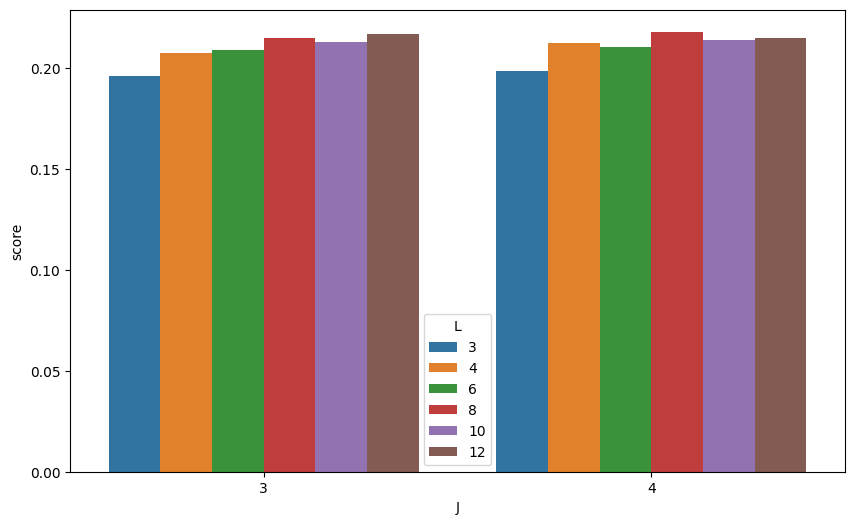

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.clf()
rcParams['figure.figsize'] = (10,6)  

sns.barplot(x = df.J, y = df['score'], hue=df.L, errorbar="sd")
plt.savefig(f'scat_transform_avgpool.png', bbox_inches='tight', dpi=100) 

In [17]:
import seaborn as sns
sns.barplot(x = df.model, y = df['score'], errorbar="sd")

AttributeError: 'DataFrame' object has no attribute 'model'

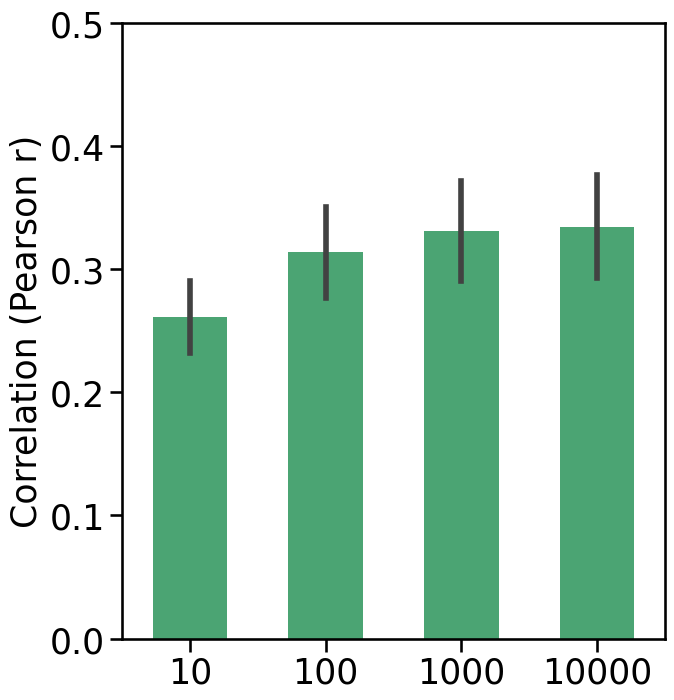

In [87]:
regions = ['V2']

plot_results(data_dict = data_dict, plot_type = 'scores_vs_num_features', x_axis = 'num_features',
                 dataset = dataset, regions = regions, 
                 palette=palette,
                 ylim = (0,0.50), 
                 width = 0.55, 
                 show_legend= False, 
                 params = (7,8), 
                 name_dict= None, 
                 file_name=f'expansion_{dataset}_{regions}_gpool={gpool}')

In [3]:
regions = ['V1']

data_dict = {}
models = ['alexnet','alexnet_untrained']

for iden in models:
    data_dict[iden] = None
        
    
layer_names = list(data_dict.keys())
palette = {layer_names[0]:'steelblue', layer_names[1]:'darkgray'}

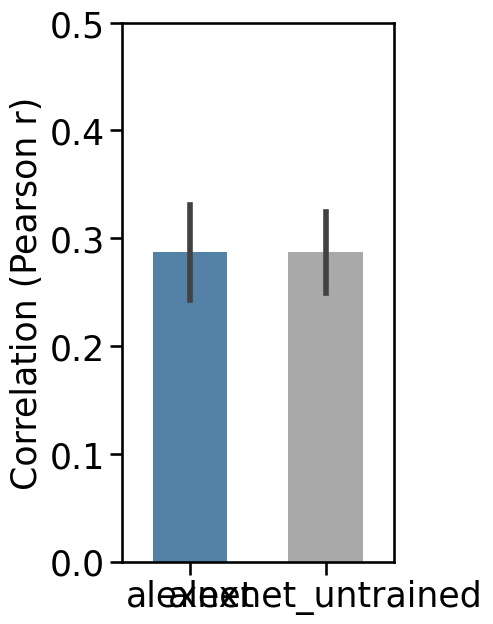

In [5]:
plot_results(best_layer=True, data_dict = data_dict, plot_type = 'compare_models', 
             dataset = dataset, regions = regions, gpool = gpool,
             palette=palette,
             ylim = (0,0.50), 
             width = 0.55, 
             show_legend= False, 
             params = (3.5,7), 
             file_name=f'{dataset}_{regions}_alexnet_gpool={gpool}')

In [8]:
regions = ['V2']

data_dict = {}
models = ['alexnet','alexnet_untrained']

for iden in models:
    data_dict[iden] = None
        
layer_names = list(data_dict.keys())
palette = {layer_names[0]:'steelblue', layer_names[1]:'darkgray'}

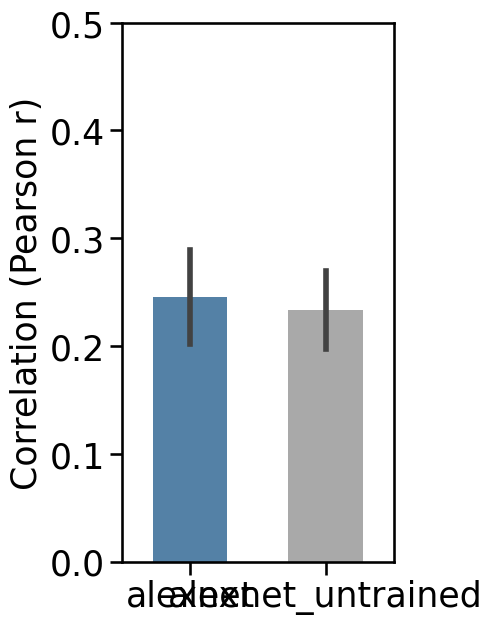

In [9]:
plot_results(best_layer=True, data_dict = data_dict, plot_type = 'compare_models', 
             dataset = dataset, regions = regions, gpool = gpool,
             palette=palette,
             ylim = (0,0.5), 
             width = 0.55, 
             show_legend= False, 
             params = (3.5,7), 
             file_name=f'{dataset}_{regions}_alexnet_gpool={gpool}')

In [12]:
regions = ['V3']

data_dict = {}
models = ['alexnet','alexnet_untrained']

for iden in models:
    data_dict[iden] = None
        
layer_names = list(data_dict.keys())
palette = {layer_names[0]:'steelblue', layer_names[1]:'darkgray'}

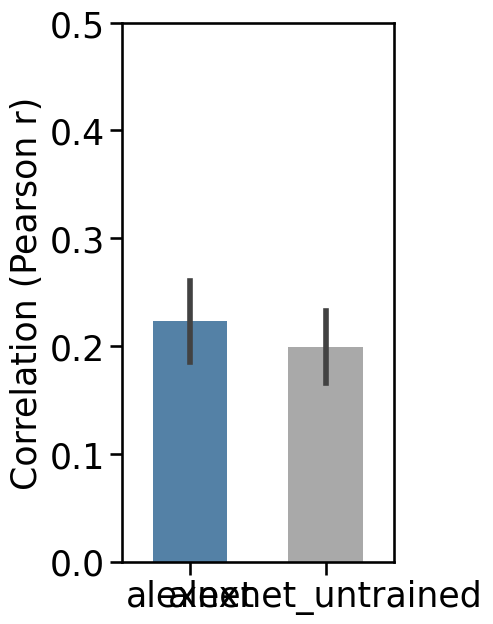

In [13]:
plot_results(best_layer=True,data_dict = data_dict, plot_type = 'compare_models', 
                 dataset = dataset, regions = regions, gpool = gpool,
                 palette=palette,
                 ylim = (0,0.5), 
                 width = 0.55, 
                 show_legend= False, 
                 params = (3.5,7), 
                 file_name=f'{dataset}_{regions}_alexnet_gpool={gpool}')

In [14]:
regions = ['V4']

data_dict = {}
models = ['alexnet','alexnet_untrained']

for iden in models:
    data_dict[iden] = None
        
layer_names = list(data_dict.keys())
palette = {layer_names[0]:'steelblue', layer_names[1]:'darkgray'}

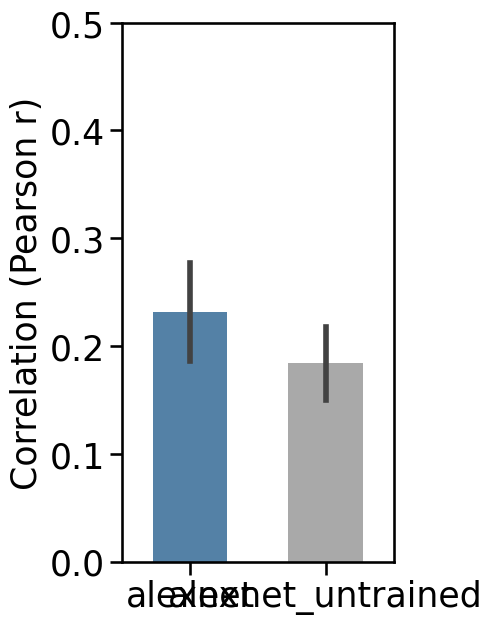

In [15]:
plot_results(best_layer=True,data_dict = data_dict, plot_type = 'compare_models', 
                 dataset = dataset, regions = regions, gpool = gpool,
                 palette=palette,
                 ylim = (0,0.5), 
                 width = 0.55, 
                 show_legend= False, 
                 params = (3.5,7), 
                 file_name=f'{dataset}_{regions}_alexnet_gpool={gpool}')

In [16]:
regions = ['general']

data_dict = {}
models = ['alexnet','alexnet_untrained']

for iden in models:
    data_dict[iden] = None
        
layer_names = list(data_dict.keys())
palette = {layer_names[0]:'steelblue', layer_names[1]:'darkgray'}

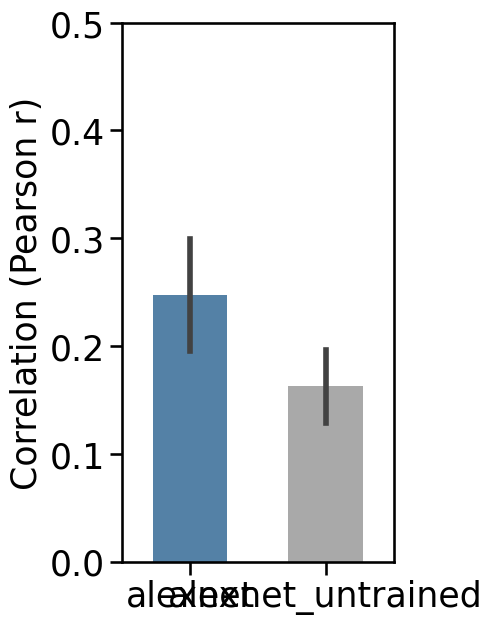

In [17]:
plot_results(best_layer=True,data_dict = data_dict, plot_type = 'compare_models', 
                 dataset = dataset, regions = regions, gpool = gpool,
                 palette=palette,
                 ylim = (0,0.5), 
                 width = 0.55, 
                 show_legend= False, 
                 params = (3.5,7), 
                 file_name=f'{dataset}_{regions}_alexnet_gpool={gpool}')

In [188]:
dataset = 'majajhong'
mode = 'ridgecv'
hook = None
gpool = True

data_dict = {}
models = ['expansion_10','expansion_100','expansion_1000','expansion_10000']
for model in models:
    data_dict[model] = load_model_dict(model,gpool=gpool)
    
palette = {'expansion_model':'mediumseagreen'}

#### V4

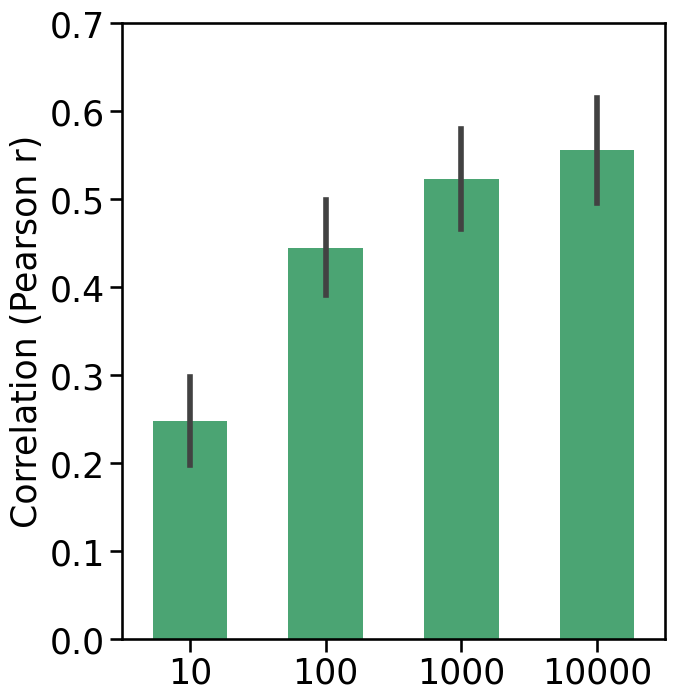

In [190]:
regions = ['V4']

plot_results(data_dict = data_dict, plot_type = 'scores_vs_num_features', x_axis = 'num_features',
                 dataset = dataset, regions = regions, 
                 palette=palette,
                 ylim = (0,0.7), 
                 width = 0.55, 
                 show_legend= False, 
                 params = (7,8), 
                 name_dict= None, 
                 file_name=f'expansion_{dataset}_{regions}_gpool={gpool}')

#### IT

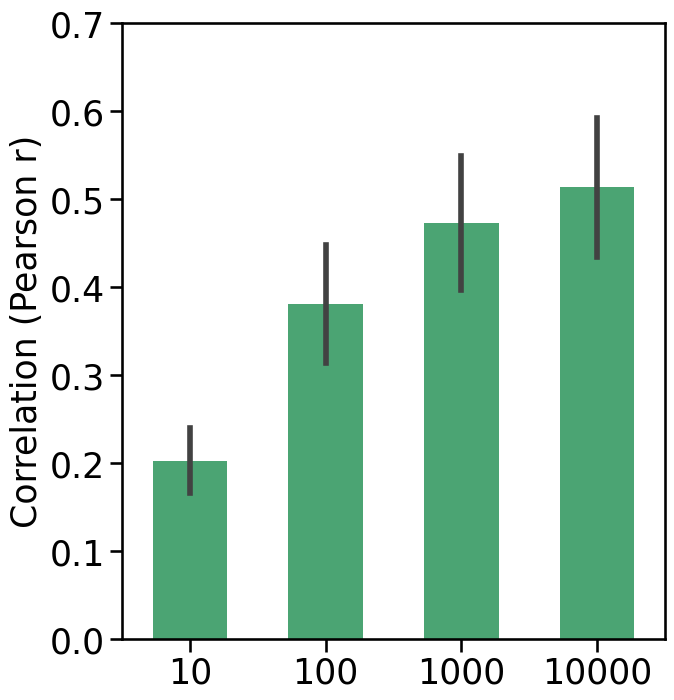

In [178]:
regions = ['IT']

plot_results(data_dict = data_dict, plot_type = 'scores_vs_num_features', x_axis = 'num_features',
                 dataset = dataset, regions = regions,  
                 palette=palette,
                 ylim = (0,0.7), 
                 width = 0.55, 
                 show_legend= False, 
                 params = (7,8), 
                 name_dict= None, 
                 file_name=f'expansion_{dataset}_{regions}_gpool={gpool}')

In [18]:
dataset = 'majajhong'
hook = None
mode = 'ridgecv'
gpool = True

In [19]:
regions = ['V4']

data_dict = {}
models = ['alexnet','alexnet_untrained']

for iden in models:
    data_dict[iden] = None
        
layer_names = list(data_dict.keys())
palette = {layer_names[0]:'steelblue', layer_names[1]:'darkgray'}

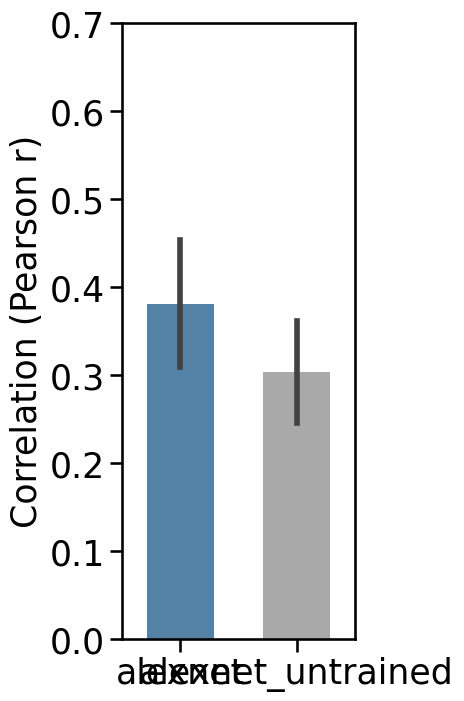

In [21]:
plot_results(best_layer=True, data_dict = data_dict, plot_type = 'compare_models', 
                 dataset = dataset, regions = regions, gpool = gpool,
                 palette=palette,
                 ylim = (0,0.7), 
                 width = 0.58, 
                 show_legend= False, 
                 params = (3,8), 
                 file_name=f'{dataset}_{regions}_alexnet_gpool={gpool}')

In [24]:
regions = ['IT']

data_dict = {}
models = ['alexnet','alexnet_untrained']

for iden in models:
    data_dict[iden] = None
        
layer_names = list(data_dict.keys())
palette = {layer_names[0]:'steelblue', layer_names[1]:'darkgray'}

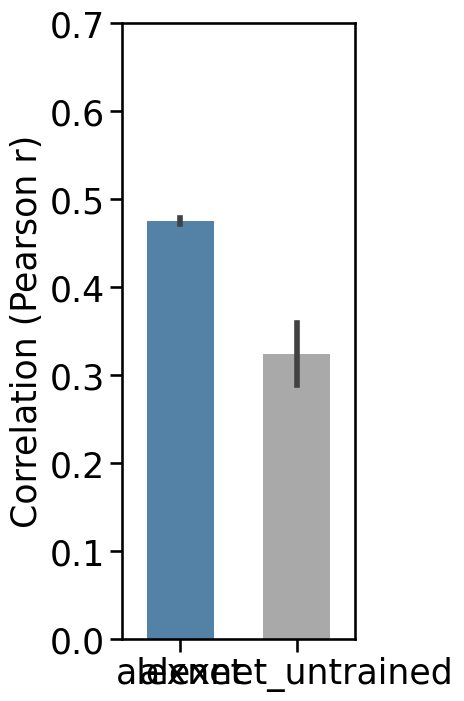

In [26]:
plot_results(best_layer=True,data_dict = data_dict, plot_type = 'compare_models', 
                 dataset = dataset, regions = regions, gpool = gpool,
                 palette=palette,
                 ylim = (0,0.7), 
                 width = 0.58, 
                 show_legend= False, 
                 params = (3,8), 
                 file_name=f'{dataset}_{regions}_alexnet_gpool={gpool}')

In [2]:
dataset = 'naturalscenes'
regions = ['general']
mode = 'ridgecv'

data_dict = {}
models = ['fully_connected_10', 'fully_connected_100', 'fully_connected_1000', 'fully_connected_10000', 
          'fully_connected_3_layers_10', 'fully_connected_3_layers_100', 'fully_connected_3_layers_1000', 'fully_connected_3_layers_10000',
          'expansion_10', 'expansion_100', 'expansion_1000', 'expansion_10000']
for model in models:
    data_dict[model] = load_model_dict(model)
    
name_dict = {'fully_connected':'Fully Connected', 'fully_connected_3_layers':'Fully Connected 3 Layers','expansion_model':'Expansion Model'}
palette = {'Expansion Model':'mediumseagreen','Fully Connected':'plum', 'Fully Connected 3 Layers':'mediumslateblue'}

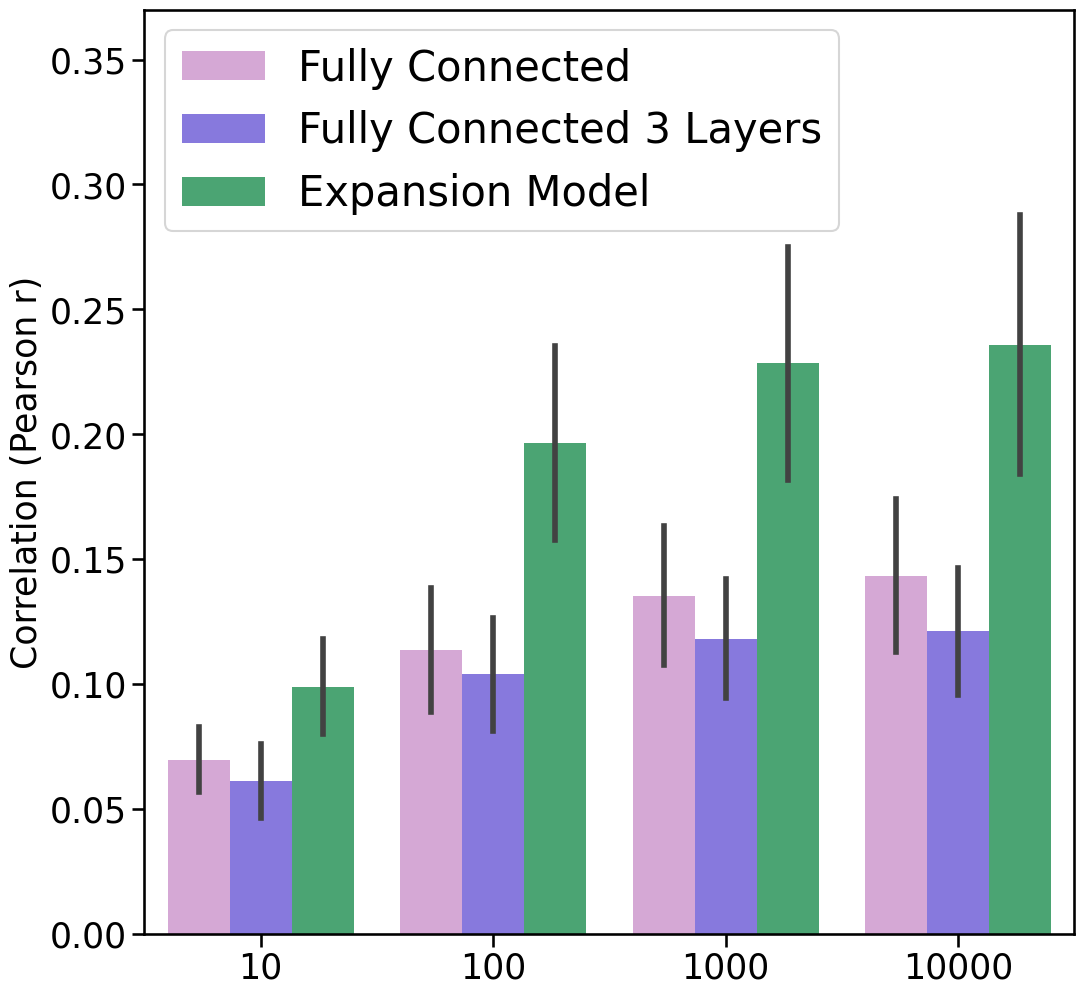

In [4]:
plot_results(data_dict = data_dict, plot_type = 'scores_vs_num_features', x_axis='num_features',
                 dataset = dataset, regions = regions, 
                 palette=palette,
                 ylim = (0,0.37), 
                 width = 0.8, 
                 show_legend= True, 
                 params = (12, 12), 
                 name_dict= name_dict, 
                 file_name=f'effect_of_architecture')

In [3]:
dataset = 'naturalscenes'
regions = ['general']
mode = 'ridgecv'


In [6]:
data_dict = {}
models = ['expansion_10000', 'expansion_linear']
for model in models:
    data_dict[model] = load_model_dict(model)
    
name_dict = {'expansion_model':'Expansion Model','expansion_model_linear':'Linear Model'}
palette = {'Expansion Model':'mediumseagreen','Linear Model':'rosybrown'}

In [4]:
regions = ['general']

data_dict = {}
data_dict['expansion_first_256_pcs'] = load_model_dict('expansion_first_256_pcs')
data_dict['alexnet'] = None
    
name_dict = {'expansion_model':'Expansion Model PCs','alexnet':'Alexnet'}
palette = {'Expansion Model PCs':'mediumseagreen','Alexnet':'steelblue'}

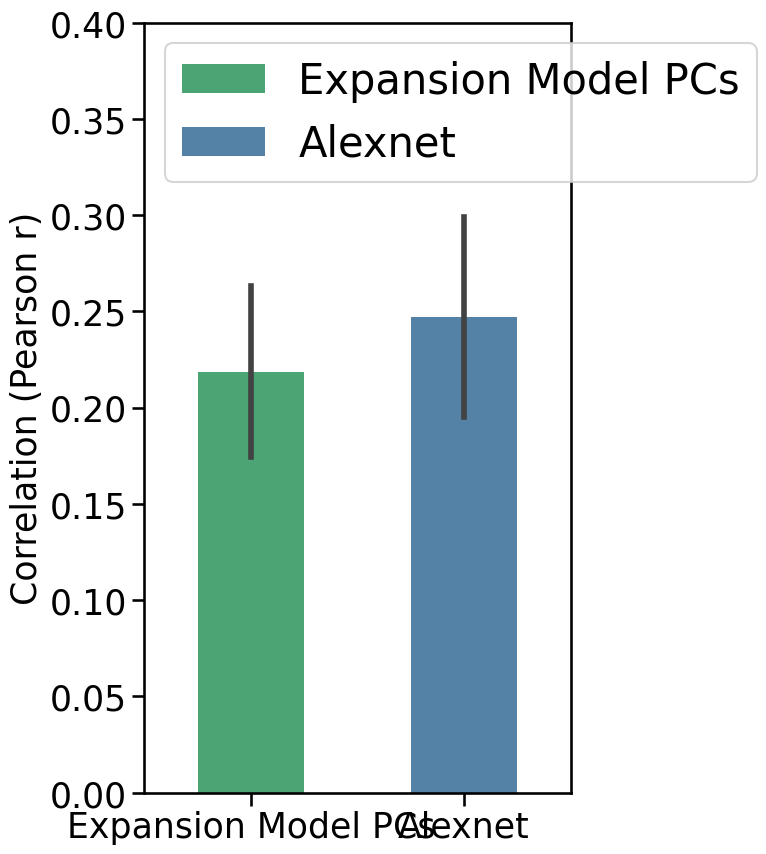

In [7]:
plot_results(data_dict = data_dict, plot_type = 'compare_models', 
                 dataset = dataset, regions = regions, 
                 palette=palette,
                 ylim = (0,0.40), 
                 width = 0.5, 
                 show_legend= True, 
                 params = (5.5,10), 
                 name_dict= name_dict, 
                 file_name=f'expansion_pcs_vs_alexnet')

In [18]:
dataset = 'naturalscenes'
regions = ['general']
mode = 'ridgecv'

data_dict = {}
models = ['expansion_10000', 'fully_random']
for model in models:
    data_dict[model] = load_model_dict(model)
    
name_dict = {'expansion_model':'Wavelet','expansion_model_fully_random':'Random'}
palette = {'Wavelet':'mediumseagreen','Random':'orange'}

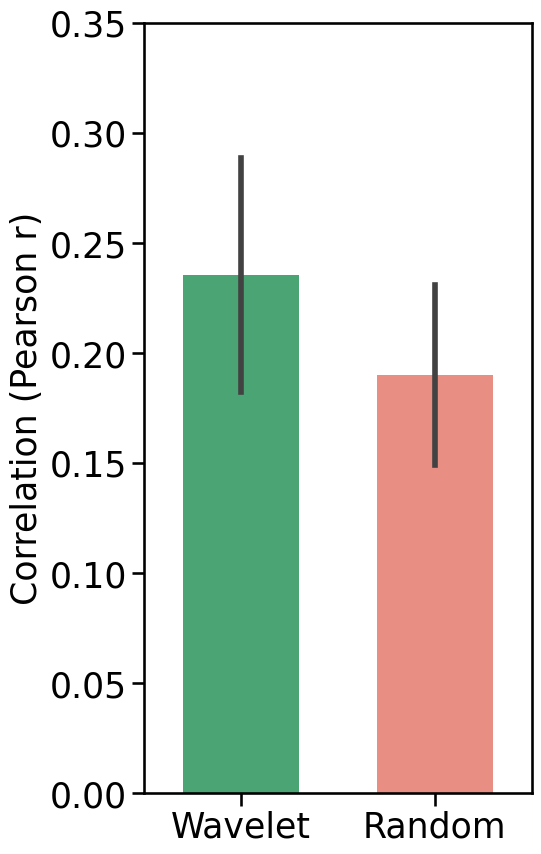

In [17]:
plot_results(data_dict = data_dict, plot_type = 'compare_models', 
                 dataset = dataset, regions = regions, 
                 palette=palette,
                 ylim = (0,0.35), 
                 width = 0.6, 
                 show_legend= False, 
                 params = (5,10), 
                 name_dict= name_dict, 
                 file_name=f'effect_of_wavelet_filters')

In [2]:
from model_evaluation.results.predicting_brain_data.tools import make_pandas_df
from model_evaluation.utils import get_activations_iden
import xarray as xr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

expansion_model_3_layers_10000_features_naturalscenes_general
alexnet_naturalscenes_general
alexnet_untrained_naturalscenes_general


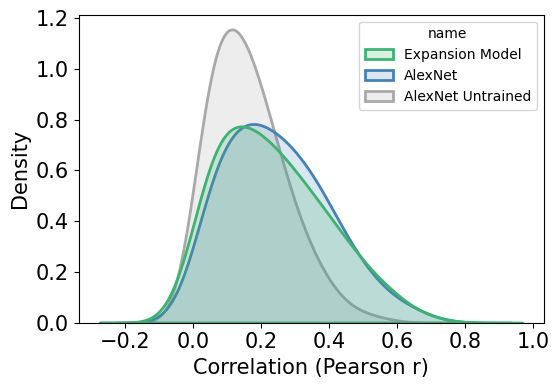

In [6]:
gpool = True
dataset = 'naturalscenes'
regions = ['general']
#regions = ['V1','V2','V3','V4']
names = ['Expansion Model','AlexNet', 'AlexNet Untrained']

scores_df = pd.DataFrame({'name':[],'scores':[]})
for region in regions:
    
    i = 0
    model_names = []
    all_voxels_scores = []
    
    scores_iden = [
                  get_scores_iden(['expansion_model','10000',region, dataset], gpool),
                  get_best_layer_iden('alexnet',dataset, region, gpool),
                  get_best_layer_iden('alexnet_untrained',dataset, region, gpool)
    ]

    
    for iden in scores_iden:
        print(iden)

        data = xr.open_dataset(os.path.join(CACHE,'encoding_scores_torch',iden), engine='h5netcdf')

        r_values = list(data.r_value.values)
        name = [names[i] for score in r_values]

        all_voxels_scores.extend(r_values)
        model_names.extend(name)
        i += 1

    scores_df = pd.concat([scores_df,pd.DataFrame({'name':model_names,'scores':all_voxels_scores})])

palette = {'AlexNet':'steelblue', 
           'AlexNet Untrained':'darkgray',
           'Expansion Model':'mediumseagreen'}

rcParams['figure.figsize'] = (6,4) 
        
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.ylabel('Density', fontsize=15)
plt.xlabel('Correlation (Pearson r)', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
sns.kdeplot(data = scores_df, x='scores',hue='name', fill=True, alpha=.2, linewidth=2,label=iden, palette=palette, bw=0.35)
#plt.legend(fontsize=30,loc='upper left')   
plt.savefig(f'kde_region={regions}.png', bbox_inches='tight', dpi=300, transparent=True) 


In [15]:
# import matplotlib.pyplot as plt
# from matplotlib import rcParams
# import seaborn as sns



# scores_df = pd.DataFrame({'name':[],'scores':[]})
# dataset = 'naturalscenes'
# regions = ['general']
# #regions = ['V1','V2','V3','V4']
# model_families = ['alexnet_conv','alexnet_untrained','expansion_model_3_layers_10000_features']


# for model in model_families:
    
#     scores_iden = []
#     for region in regions:
#         best_layer = True
#         if 'expansion' in model:
#             best_layer = False
#         iden = get_scores_iden(model, dataset, region, best_layer=best_layer)[0]
#         scores_iden.append(iden)
    

#     for iden in scores_iden:
#         data = xr.open_dataset(os.path.join(CACHE,'encoding_scores',iden), engine='h5netcdf')
        
#         all_voxels_scores = []
#         model_names = []
#         r_values = []
#         for subject in range(8):
#             s_data = data.where(data.subject==subject, drop=True)
#             r_values.append(s_data.r_value.values.mean())
        
#         name = [model for r_value in r_values]
#         all_voxels_scores.extend(r_values)
#         model_names.extend(name)
        
#         scores_df = pd.concat([scores_df,pd.DataFrame({'name':model_names,'scores':all_voxels_scores})])
    
    
    
    
    

# scores_df['name'] = scores_df['name'].map({'alexnet_conv':'AlexNet',
#                            'alexnet_untrained':'AlexNet Untrained',
#                            'expansion_model_3_layers_10000_features':'Expansion Model'})




# palette = {'AlexNet':'steelblue', 
#            'AlexNet Untrained':'darkgray',
#            'Expansion Model':'mediumseagreen'}

# rcParams['figure.figsize'] = (6,4) 
        
# plt.rc('xtick', labelsize=12) 
# plt.rc('ytick', labelsize=12) 
# plt.ylabel('Density', fontsize=15)
# plt.xlabel('Correlation (Pearson r)', fontsize=15)
# plt.xticks(size=15)
# plt.yticks(size=15)
# sns.kdeplot(data = scores_df, x='scores',hue='name', fill=True, alpha=.2, linewidth=2,label=iden, palette=palette)
# #plt.legend(fontsize=30,loc='upper left')   
# plt.savefig(f'kde_subject_means_region={regions}.png', bbox_inches='tight', dpi=300, transparent=True) 
